# APROXIMAÇÃO E INTERPOLAÇÃO

Mais informações no site www.vento.eng.br, desenvolvido pelo Dr. Paulo Jabardo.

No geral, os objetivos principais são: 

* modelar dados experimentais; e
* aproximar uma função complexa utilizando uma função mais simples.

Uma forma geral de aproximação se dá por meio de funções peso $w_k$, de modo que

$$\int_a^b u(x)w_k(x)dx = \int_a^b u^*(x)w_k(x)dx $$

Fazendo $w_k(x) = \delta(x_k)$ (delta de Dirac), encontra-se a interpolação, que acha uma curva que passa exatamente pelos pontos conhecidos (colocação), ou seja, pontos para os quais o erro vale zero: $u(x) - u^*(x) = \varepsilon(x)=0$.

Pode-se também minimizar o erro quadrático total, o que nada mais é do que o método dos mínimos quadrados. Neste método a função aproximada não passa necessariamente pelos pontos conhecidos.

Escolhendo $w_k(x) = \phi(x)$ temos o método de Garlekin, muito utilizado no método dos elementos finitos.

## Polinômio de Lagrange

São utilizados para interpolação dos dados medidos. O pelinômio pode ser escrito na forma:

$$ f(x) = \sum_{i=1}^k f(x_i)L_i(x) $$

em que $L_i(x)$ são os interpoladores de Lagrange, que podem ser escritos, de forma genérica, como mostrado abaixo.

$$ L_{n,k}(x) = \prod_{i=0,i\neq k}^n \frac{(x-x_i)}{(x_k-x_i)}$$

Nesta formulação $n$ representa o grau da interpolação.

**<u>Exemplo de interpolação linear</u>**

$$ p(x) = L_0(x)f(x_0) + L_1(x)f(x_1) $$

Sendo 

$$ L_0(x) = \frac{(x-x_1)}{(x_0-x_1)} \qquad e \qquad L_1(x) = \frac{(x-x_0)}{(x_1-x_0)}$$

Notar que a formulação faz o polinômio passar pelos pontos $x_0$ e $x_1$, ou seja, $L_0(x)=1$ em $x_0$ e $L_0(x)=0$ em $x_1$, por outro lado $L_1(x)=0$ em $x_0$ e $L_1(x)=1$ em $x_1$. Generalizando,

$$ L_i(x_i) = \delta_{ij} $$

em que $\delta_{ij}$ é o delta de Kronecker, e vale 1 para $i=j$ e zero em $i \neq j$.

Como exemplo vamos interpolar a função $f(x) = \frac{1}{2}x^3 - 3x^2+2x$ linearmente nos pontos 1,2,3,4 e 5. 

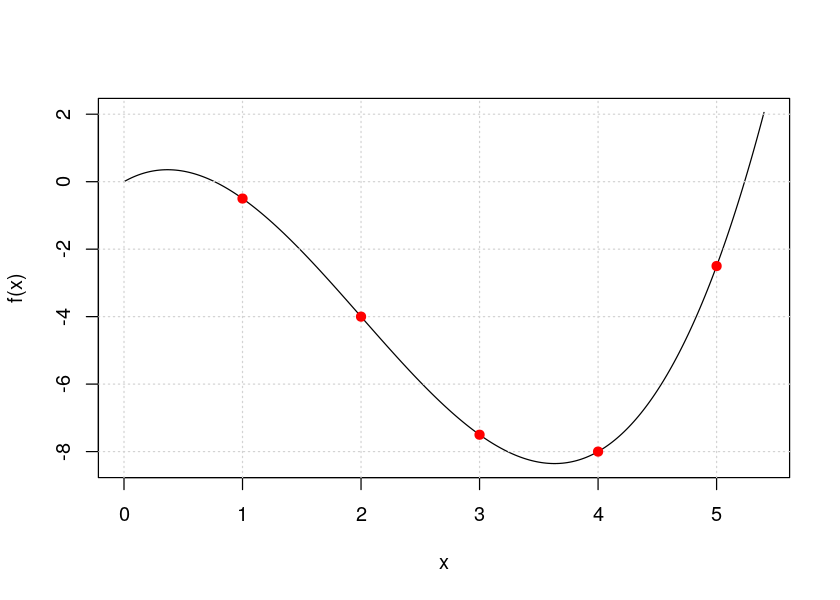

In [5]:
# Utilizado apenas para reduzir tamanho dos gráficos
require(repr)
options(repr.plot.width=7, repr.plot.height=5)

# Pontos exatos da função proposta
funExata <- function(x){
    y <- 0.5*x^3 - 3*x^2 +2*x
    return(y)
}

# Plotando função e pontos que serão considerados para fazer interpolação
xx <- seq(0,5.4,by=0.02)
plot(xx,funExata(xx), t='l', xlab='x',ylab='f(x)')
grid()
points(1:5, funExata(1:5), col=2, pch=19)

In [2]:
# Função para o cálculo do interpolador de lagrange
# k: índice do nó considerado
# p: nós para interpolação 
#    2 nós equivale a interpolação linear, 3 a interpolação quadrática...
# x: discretização entre os nós considerados
lagrange <- function(k, p, x){

    L <- 1
    np <- length(p)
    for(i in 1:np){
        if(i!=k){
            L <- L*(x-p[i])/(p[k]-p[i])
        }
    }    
    return(L)
}

In [3]:
# Função para encontrar polinômio de Lagrange
# x e y: coordenadas dos nós
# dh:passo
# grau: grau da interpolação
solveLagrange <- function(x,y,dh,grau){
    nh <- length(x)-1
    ni <- nh/grau
    data <- c()
    for(i in 1:ni){
        w <- 1 + (i-1)*grau
        k <- w+grau
        dx <- seq(x[w], x[k], by=dh)
        xx <- x[w:k]
        yy <- y[w:k]
        v <- c()
        for(j in 1:(grau+1)){
            vtemp <- lagrange(j,xx,dx)*yy[j]
            v <- cbind(v,vtemp)
        }
        dtemp <- cbind(dx,rowSums(v))
        data <- rbind(data,dtemp)
    }
    return(data)
}


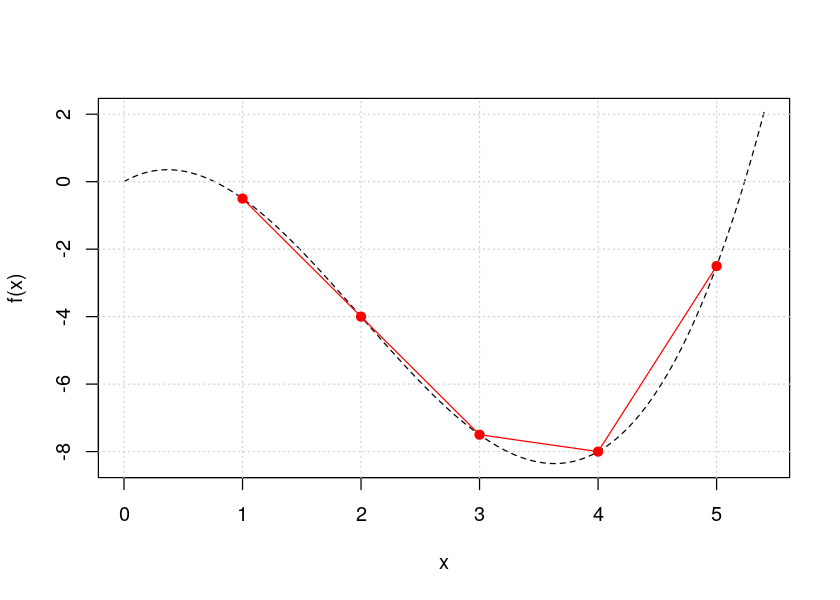

In [4]:
# LINEAR

linear <- solveLagrange(x=1:5,y=funExata(1:5), dh=0.1, grau=1)

# Plotando função com o resultado da interpolação linear
xx <- seq(0,5.4,by=0.02)
plot(xx,funExata(xx), t='l', lty=2, xlab='x', ylab='f(x)')
grid()
points(1:5, funExata(1:5), col=2, pch=19)
lines(linear[,1], linear[,2], col=2, t='l')

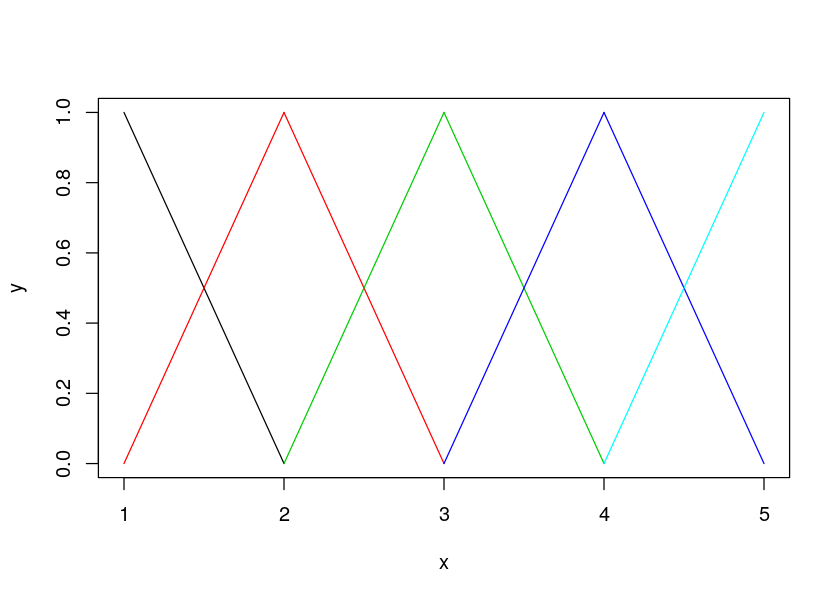

In [5]:
# Mostrando os interpoladores lineares para  cada intervalo

plot(x=1, y=1, xlim=c(1,5), ylim=c(0,1),t='n', xlab='x', ylab='y')

for(i in 1:4){
    j <- i+1
    xx <- i:j
    xl <- seq(i,j,by=0.1)
    for(w in 1:2){
        d <- lagrange(w, xx, xl)
        lines(xl, d, col=xx[w])
    }
}

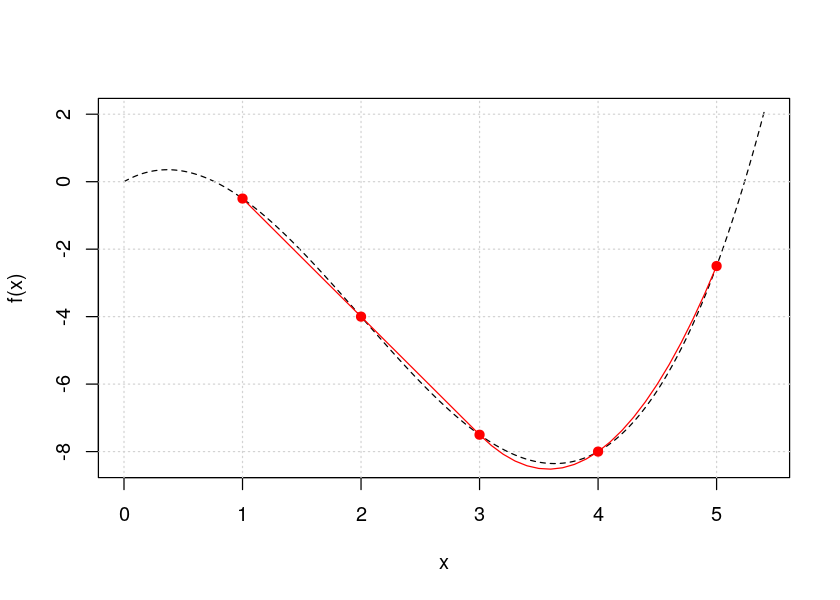

In [6]:
# QUADRÁTICA

quad <- solveLagrange(x=1:5,y=funExata(1:5), dh=0.1, grau=2)

# Plotando função com a interpolação quadrática
xx <- seq(0,5.4,by=0.02)
plot(xx,funExata(xx), t='l', lty=2, xlab='x', ylab='f(x)')
grid()
points(1:5, funExata(1:5), col=2, pch=19)
lines(quad[,1], quad[,2], col=2, t='l')

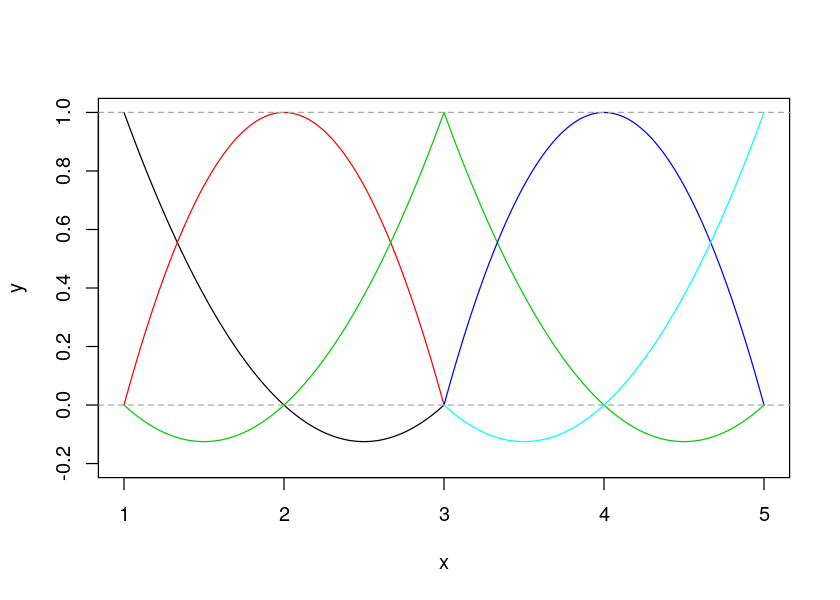

In [7]:
# Interpolador de grau 2

# Mostrando interpoladores de cada intervalo
plot(x=1, y=1, xlim=c(1,5), ylim=c(-0.2,1),t='n', xlab='x', ylab='y')

for(i in c(1,3)){
    j <- i+2
    xx <- i:j
    xl <- seq(i,j,by=0.02)
    for(w in 1:3){
        d <- lagrange(w, xx, xl)
        lines(xl, d, col=xx[w])
    }
}

abline(h=c(0,1), lty=2, col='darkgray')